Рассмотрим основные моменты не вошедшие в предыдущие лекции

In [131]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Импортируем датасет MNIST.

In [132]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

Объем тренировочного набора данных:

In [133]:
len(X_train)

60000

Посмотрим, что из себя представляет, например, нулевой объект.

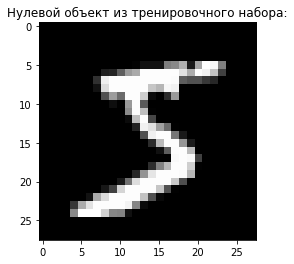

In [134]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

Отклик нулевого объекта из тренировочного набора:

In [135]:
y_train[0]

5

In [136]:
dim = 784 # 28*28
X_train = X_train.reshape(len(X_train), dim)

Для разделения данных рекомендуем использовать функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=95)
print(X_train[0])
sum(X_train[0])/len(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   6  82 254 254 208  13  71   9   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  23 192 254 253 253 253 253 253 217 100   3   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  14 234 253 254 253 253 253 253 253
 253 253  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  57 202 253 253 252 193  84 117 253 253 253 253 10

44.93622448979592

Уменьшим размерность тестовых данных, выбрав 56 главных компонент

In [138]:
from sklearn.decomposition import PCA

pca = PCA(n_components=56, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)
print(X_train[0])
sum(X_train[0])/len(X_train[0])

[ 1.28337084e+03 -1.04800173e+02  1.42991945e+02 -6.47892244e+02
 -8.54067310e+02 -4.84926891e+01 -3.91969672e+02 -5.33535077e+02
 -8.41423121e+00 -1.76202406e+02 -3.47894019e+01 -9.00705007e+01
 -2.29423996e+02  7.37736858e+01  6.57217058e-01 -3.04193125e+02
 -4.07119857e+02  7.53260921e+01  3.56318313e+02 -2.50047254e+02
 -1.30150083e+02 -3.55851803e+02  2.28010034e+01  6.26220617e+01
 -1.82677140e+02 -8.08689448e+01  1.04708142e+02 -1.11085909e+02
 -4.08822464e+01 -6.44973192e+01  2.85176242e+02 -1.89794864e+02
  1.69224853e+02  3.30027973e+01  5.62114220e+01  2.69018150e+01
 -1.56530486e+02  4.41171441e+01 -8.16342124e+01 -9.94034392e+01
 -1.18051041e+02 -2.69082757e+01 -9.42997639e+01  1.81021857e+02
  4.12392286e+01 -4.19166922e+01  1.47258376e+02 -6.19561439e+01
 -5.44170967e+00 -5.25653554e+01 -1.43149713e+02  3.11998361e+01
 -3.20925652e+01  5.85184616e+01  7.75120712e+00 -1.78461886e+02]


-55.80437488019424

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [139]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Обучаем модель дерево принятия решений:

In [140]:
tree = LogisticRegression(solver='lbfgs', random_state=95)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

AttributeError: 'str' object has no attribute 'decode'

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [ ]:
y_pred = clf.predict(X_test)

Выполняем оценку:

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

Число верно классифицирвоанных объектов класа 6

In [ ]:
CM[6][0]



